In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv("FinalMerge.csv",encoding="latin1")

In [3]:
df_act_dir = pd.read_csv("FinalClean.csv",encoding="latin1")

In [4]:
df_act_dir = df_act_dir[["actor_popularity","director_popularity"]]
df = pd.concat([df,df_act_dir],axis=1)

In [5]:
df.shape

(2384, 21)

In [6]:
df.isnull().sum()

Unnamed: 0               0
imdb_id                  0
X.x                      0
Actors                   1
Country                  0
Director                 1
Genre                    1
IMDB.Rating              1
IMDB.Votes               1
Language                 2
Production             157
Rated                  198
Released                 0
Runtime                  6
Title                    0
Year                     0
X.y                      0
budget                   0
revenue                  0
actor_popularity         0
director_popularity      0
dtype: int64

In [7]:
col_replace = {"Actors":"actors","Country":"country","Director":"director","Genre":"genre",
               "IMDB.Rating":"imdb_rating","IMDB.Votes":"imdb_votes","Language":"language",
               "Released":"released","Runtime":"runtime","Year":"year",
               "Production":"production","Rated":"rated"}
df = df.drop(["Unnamed: 0","imdb_id","Title","X.x","X.y"],axis=1).rename(columns=col_replace)

In [8]:
# drop_missing_value
mis_val_col = ["actors","director","genre","imdb_votes","runtime","imdb_rating","language"]
for col in mis_val_col:
    df = df.drop(df[df[col].isnull()].index)

In [9]:
df.isnull().sum(),df.shape

(actors                   0
 country                  0
 director                 0
 genre                    0
 imdb_rating              0
 imdb_votes               0
 language                 0
 production             148
 rated                  189
 released                 0
 runtime                  0
 year                     0
 budget                   0
 revenue                  0
 actor_popularity         0
 director_popularity      0
 dtype: int64, (2373, 16))

In [10]:
num_feat = []
cate_feat = []
for i in df.columns:
    if (df[i]).dtype == "int64" or (df[i]).dtype == "float64":
        num_feat.append(i)
    else:
        cate_feat.append(i)

In [11]:
print(num_feat,len(num_feat))
print(cate_feat, len(cate_feat))

['imdb_rating', 'year', 'budget', 'revenue', 'actor_popularity', 'director_popularity'] 6
['actors', 'country', 'director', 'genre', 'imdb_votes', 'language', 'production', 'rated', 'released', 'runtime'] 10


## Numeric features

### imdb_rating

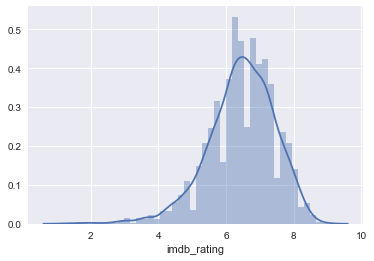

In [12]:
sns.distplot(df["imdb_rating"])
# df["imdb_rating"].hist()

### budget

In [14]:
import math
df["budget"] = df["budget"].map(lambda x:math.log(x))

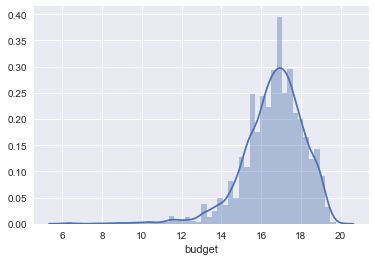

In [15]:
# df["budget"].hist()
sns.distplot(df["budget"])

### revenue (target)

In [16]:
# df["revenue"].hist()
# sns.distplot(df["revenue"],kde=False)
df["revenue"] = df["revenue"].map(lambda x:math.log(x))

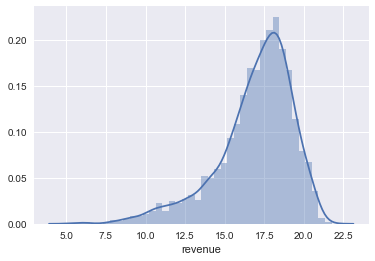

In [17]:
sns.distplot(df["revenue"])

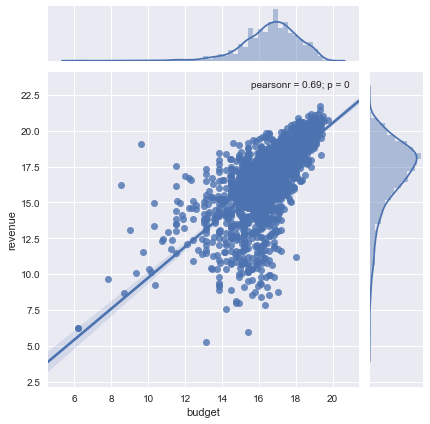

In [18]:
sns.jointplot(x="budget",y="revenue",data=df,kind="reg")

## Categorical features

### country

In [19]:
# # regions/countries involved in producing movies
df["country"] = df["country"].map(lambda x:len(str(x).split(",")))
# df["country"].value_counts().plot.bar(figsize=(16,6))
# df["country"].nunique()
#  /df.shape[0]).plot.bar(figsize=(16,6))
# sns.boxplot(x="country",y="revenue",data=df)

In [ ]:
# df["country"].value_counts()
# df = df.drop("country",axis=1)

In [20]:
num_feat.append("country")
print(num_feat,len(num_feat))
cate_feat.remove("country")
print(cate_feat, len(cate_feat))

['imdb_rating', 'year', 'budget', 'revenue', 'actor_popularity', 'director_popularity', 'country'] 7
['actors', 'director', 'genre', 'imdb_votes', 'language', 'production', 'rated', 'released', 'runtime'] 9


### genre

In [21]:
df = pd.concat([df, df['genre'].str.get_dummies(sep=', ')], axis=1) 
df['Thriller'] = df[['Thriller', 'Horror']].sum(axis=1)
df['Fantasy'] = df[['Fantasy', 'Sci-Fi']].sum(axis=1)
df['Other_genre'] = df[['Music', 'History', 'Sport', 'War', 'Western', 'Musical', 'Documentary', 'News']].sum(axis=1)
df.drop(['Music', 'History', 'Sport', 'War', 'Western', 'Musical', 'Documentary', 'News', 'Horror', 'Sci-Fi'], 
        axis=1, inplace=True)
genre_lst = list(df)[19:32]
for x in genre_lst:
    #print(x)
    df.loc[df['%s' % x] > 1, '%s' % x] = 1
    #print(df['%s' % x].value_counts())
df = df.drop("genre",axis=1)

In [22]:
genre_dict = {}
for i in df.columns[14:]:
    genre_dict.update({i:i.lower()})
df = df.rename(columns = genre_dict)

In [23]:
for i in df.columns[14:]:
    num_feat.append(i)
print(num_feat,len(num_feat))
cate_feat.remove("genre")
print(cate_feat, len(cate_feat))

['imdb_rating', 'year', 'budget', 'revenue', 'actor_popularity', 'director_popularity', 'country', 'director_popularity', 'action', 'adventure', 'animation', 'biography', 'comedy', 'crime', 'drama', 'family', 'fantasy', 'mystery', 'romance', 'thriller', 'other_genre'] 21
['actors', 'director', 'imdb_votes', 'language', 'production', 'rated', 'released', 'runtime'] 8


### imdb_votes

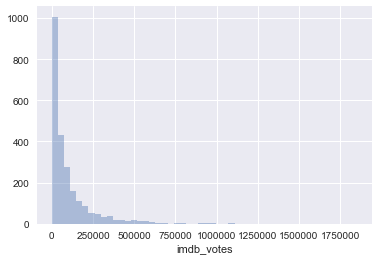

In [24]:
df["imdb_votes"] = df["imdb_votes"].astype(str).str.replace("\D+","").astype(int)
# df["imdb_votes"].hist()
sns.distplot(df["imdb_votes"],kde=False)

In [25]:
df["imdb_votes"] = df["imdb_votes"].map(lambda x:math.log(x))

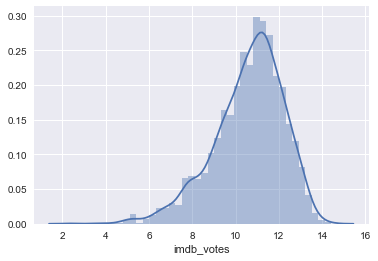

In [26]:
sns.distplot(df["imdb_votes"])

In [27]:
num_feat.append("imdb_votes")
cate_feat.remove("imdb_votes")
print(num_feat,len(num_feat))
print(cate_feat, len(cate_feat))

['imdb_rating', 'year', 'budget', 'revenue', 'actor_popularity', 'director_popularity', 'country', 'director_popularity', 'action', 'adventure', 'animation', 'biography', 'comedy', 'crime', 'drama', 'family', 'fantasy', 'mystery', 'romance', 'thriller', 'other_genre', 'imdb_votes'] 22
['actors', 'director', 'language', 'production', 'rated', 'released', 'runtime'] 7


### language

In [28]:
# list length
df["language"] = df["language"].map(lambda x:len(str(x).split(",")))

In [29]:
df["language"].value_counts()

1     1466
2      533
3      229
4       83
5       42
6       11
9        6
19       1
7        1
8        1
Name: language, dtype: int64

In [30]:
num_feat.append("language")
cate_feat.remove("language")
print(num_feat,len(num_feat))
print(cate_feat, len(cate_feat))

['imdb_rating', 'year', 'budget', 'revenue', 'actor_popularity', 'director_popularity', 'country', 'director_popularity', 'action', 'adventure', 'animation', 'biography', 'comedy', 'crime', 'drama', 'family', 'fantasy', 'mystery', 'romance', 'thriller', 'other_genre', 'imdb_votes', 'language'] 23
['actors', 'director', 'production', 'rated', 'released', 'runtime'] 6


### production

In [31]:
# frequency encoding
df["production"] = df["production"].replace(np.nan, "Unknown")\
                    .map(lambda x: x.split(" ")[0] if len(x) > 1 else x)
# (df["production"].value_counts()/df.shape[0])[:100].plot.bar(figsize=(16,6))
# zip_freq = list(df_2014['addrzip'].value_counts()[:20].index)
# df_2014['addrzip'] = df_2014['addrzip'].map(lambda s:'others' if s not in zip_freq else s)
# list(df_2014['addrzip'].value_counts().index)
# zip_map = {'others':20,'750':0,'945':1,'112':2,'606':3,'300':4,'070':5,'331':6,'100':7,'770':8,
#            '900':9,'117':10,'917':11,'104':12,'891':13,'330':14,'852':15,'921':16,'913':17,'926':18,'925':19}
# df_2014['addrzip'] = df_2014['addrzip'].map(lambda s: zip_map.get(s) if s in zip_map else s)

In [32]:
prod_freq = list(df["production"].value_counts()[:20].index)

In [33]:
df["production"] = df["production"].map(lambda s:"other_productions" if s not in prod_freq else s)

In [34]:
prod_counts = df["production"].value_counts()
prod_dict = prod_counts.to_dict()

In [35]:
df["production"] = df["production"].map(lambda s:prod_dict.get(s) if s in prod_dict else s)

In [36]:
df["production"].unique()

array([102, 163,  21, 210, 701,  27,  20, 127,  50,  60, 155, 206,  80,
        37,  78, 149,  57,  46,  24,  32,  28], dtype=int64)

In [37]:
# high cardinality: may use frequency encoding
# (df["production"].value_counts()/df.shape[0])[:].sum()

In [38]:
num_feat.append("production")
cate_feat.remove("production")
print(num_feat,len(num_feat))
print(cate_feat, len(cate_feat))

['imdb_rating', 'year', 'budget', 'revenue', 'actor_popularity', 'director_popularity', 'country', 'director_popularity', 'action', 'adventure', 'animation', 'biography', 'comedy', 'crime', 'drama', 'family', 'fantasy', 'mystery', 'romance', 'thriller', 'other_genre', 'imdb_votes', 'language', 'production'] 24
['actors', 'director', 'rated', 'released', 'runtime'] 5


### rated

In [39]:
df["rated"].value_counts()

R            936
PG-13        774
PG           285
NOT RATED    129
G             29
UNRATED       22
TV-MA          4
TV-14          2
NC-17          2
TV-PG          1
Name: rated, dtype: int64

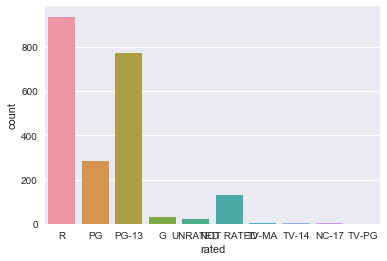

In [40]:
# df["rated"].value_counts().plot.bar()
sns.countplot(x="rated", data=df)

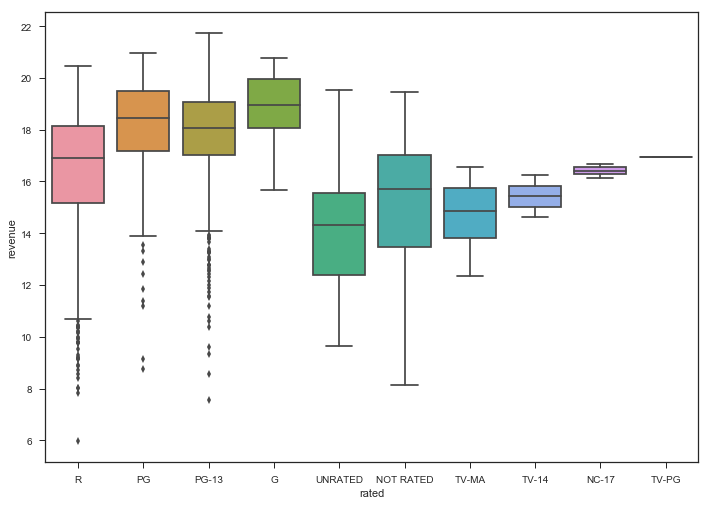

In [41]:
sns.set_style('ticks')
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(11.7, 8.27)
sns.boxplot(x="rated", y="revenue", data=df)

In [42]:
df["rated"] = df["rated"].replace(np.nan, "UNRATED")\
            .replace("NOT RATED", "UNRATED")

In [43]:
df = pd.concat([df, df['rated'].str.get_dummies(sep=', ')], axis=1) 

In [44]:
df.columns[28:]

Index(['G', 'NC-17', 'PG', 'PG-13', 'R', 'TV-14', 'TV-MA', 'TV-PG', 'UNRATED'], dtype='object')

In [45]:
for i in df.columns[28:]:
    num_feat.append(i)
cate_feat.remove("rated")
print(num_feat,len(num_feat))
print(cate_feat, len(cate_feat))

['imdb_rating', 'year', 'budget', 'revenue', 'actor_popularity', 'director_popularity', 'country', 'director_popularity', 'action', 'adventure', 'animation', 'biography', 'comedy', 'crime', 'drama', 'family', 'fantasy', 'mystery', 'romance', 'thriller', 'other_genre', 'imdb_votes', 'language', 'production', 'G', 'NC-17', 'PG', 'PG-13', 'R', 'TV-14', 'TV-MA', 'TV-PG', 'UNRATED'] 33
['actors', 'director', 'released', 'runtime'] 4


In [46]:
df = df.drop("rated",axis=1)

### released

In [47]:
# index of released date col
index = df.columns.get_loc("released")
#change date data to timestamp
release_dates = pd.to_datetime(df["released"])
# released date is weekend of not
weekend_list = []
for each in release_dates:
    day_ofweek = each.dayofweek
    if day_ofweek >= 4 and day_ofweek <= 6:
        tag = 1
    else:
        tag = 0
    weekend_list.append(tag)
# released date is on dump months
dumpmonth_list = []
for each in release_dates:
    month = each.month
    if month == 12 or month == 1 or month == 2 or month == 8 or month ==9:
        tag = 1
    else:
        tag = 0
    dumpmonth_list.append(tag)
df.insert(loc=index+1,column = "released_on_weekend",value=weekend_list)
df.insert(loc=index+2,column = "released_on_dump_month",value=dumpmonth_list)

In [48]:
num_feat.append("released_on_weekend")
num_feat.append("released_on_dump_month")
cate_feat.remove("released")
print(num_feat,len(num_feat))
print(cate_feat, len(cate_feat))

['imdb_rating', 'year', 'budget', 'revenue', 'actor_popularity', 'director_popularity', 'country', 'director_popularity', 'action', 'adventure', 'animation', 'biography', 'comedy', 'crime', 'drama', 'family', 'fantasy', 'mystery', 'romance', 'thriller', 'other_genre', 'imdb_votes', 'language', 'production', 'G', 'NC-17', 'PG', 'PG-13', 'R', 'TV-14', 'TV-MA', 'TV-PG', 'UNRATED', 'released_on_weekend', 'released_on_dump_month'] 35
['actors', 'director', 'runtime'] 3


In [49]:
df = df.drop("released",axis=1)

### runtime

In [50]:
df["runtime"].dtype

dtype('O')

In [51]:
df["runtime"] = df["runtime"].map(lambda x:int(x.strip("min")))

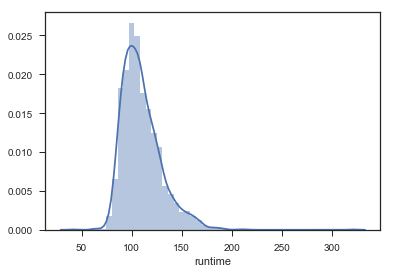

In [52]:
sns.distplot(df["runtime"])

In [53]:
num_feat.append("runtime")
cate_feat.remove("runtime")
print(num_feat,len(num_feat))
print(cate_feat, len(cate_feat))

['imdb_rating', 'year', 'budget', 'revenue', 'actor_popularity', 'director_popularity', 'country', 'director_popularity', 'action', 'adventure', 'animation', 'biography', 'comedy', 'crime', 'drama', 'family', 'fantasy', 'mystery', 'romance', 'thriller', 'other_genre', 'imdb_votes', 'language', 'production', 'G', 'NC-17', 'PG', 'PG-13', 'R', 'TV-14', 'TV-MA', 'TV-PG', 'UNRATED', 'released_on_weekend', 'released_on_dump_month', 'runtime'] 36
['actors', 'director'] 2


### actors & directors

In [54]:
df = df.drop(["actors","director"],axis=1)

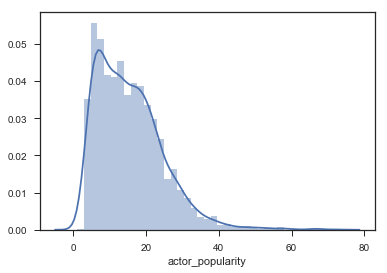

In [55]:
sns.distplot(df["actor_popularity"])

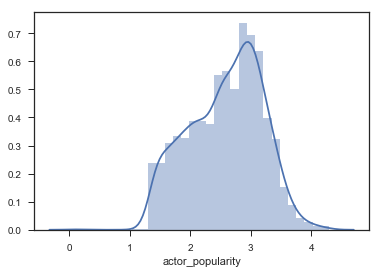

In [83]:
sns.distplot(df["actor_popularity"].map(lambda x:math.log(x)+0.01))

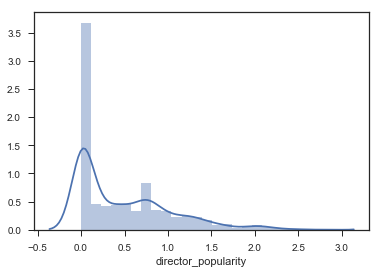

In [81]:
sns.distplot(df["director_popularity"].map(lambda x:math.log(x)))

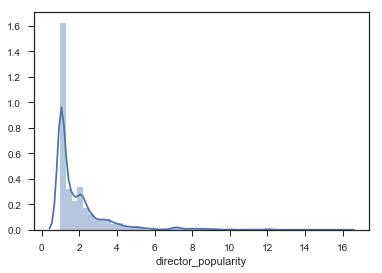

In [57]:
sns.distplot(df["director_popularity"])

In [58]:
cate_feat.remove("actors")
cate_feat.remove("director")
print(num_feat,len(num_feat))
print(cate_feat, len(cate_feat))

['imdb_rating', 'year', 'budget', 'revenue', 'actor_popularity', 'director_popularity', 'country', 'director_popularity', 'action', 'adventure', 'animation', 'biography', 'comedy', 'crime', 'drama', 'family', 'fantasy', 'mystery', 'romance', 'thriller', 'other_genre', 'imdb_votes', 'language', 'production', 'G', 'NC-17', 'PG', 'PG-13', 'R', 'TV-14', 'TV-MA', 'TV-PG', 'UNRATED', 'released_on_weekend', 'released_on_dump_month', 'runtime'] 36
[] 0


## Standardization

In [60]:
x_train = df[df["year"] <= 2013].drop("revenue",axis=1)
x_test = df[df["year"] > 2013].drop("revenue",axis=1)
y_train = df[df["year"] <= 2013]["revenue"]
y_test = df[df["year"] > 2013]["revenue"]

In [61]:
# num_feat.remove("revenue")
# stand_feat = []
# nonstand_feat = []
# for feat in num_feat:
#     if X[feat].nunique() > 2:
#         stand_feat.append(feat)
#     else:
#         nonstand_feat.append(feat)

In [62]:
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# scaler_feat = scaler.fit_transform(X[stand_feat])
# X_feat = pd.DataFrame(scaler_feat,columns=X[stand_feat].columns)
# pd.concat([X_feat,X[nonstand_feat]],axis=1)

In [63]:
df.shape

(2373, 35)

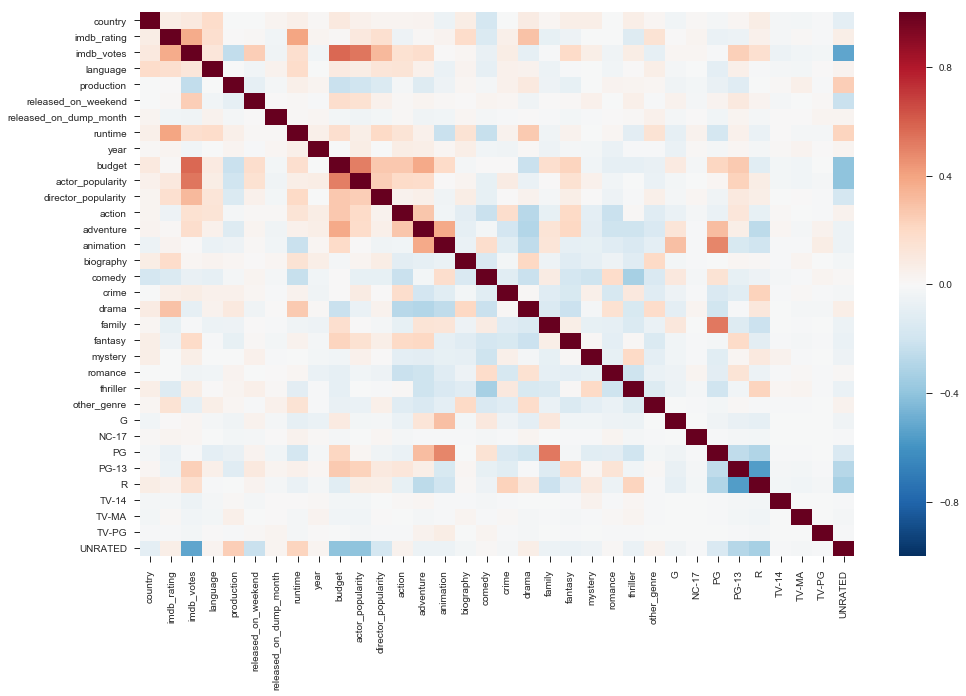

In [65]:
fig, ax = plt.subplots()
fig.set_size_inches(16, 10)
sns.heatmap(df.drop("revenue",axis=1).corr())

In [66]:
# sns.pairplot(df.drop("revenue",axis=1))

## Regression Model

In [67]:
# from sklearn.model_selection import train_test_split
# x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)

In [68]:
from sklearn.linear_model import LinearRegression

22.5238818816


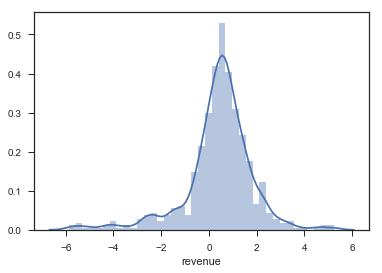

In [71]:
lrm = LinearRegression()
lrm.fit(x_train,y_train)
print(lrm.intercept_)
lrm.coef_
cdf = pd.DataFrame(lrm.coef_,x_train.columns,columns=["Coeff"])
predictions = lrm.predict(x_test)
# plt.scatter(y_test, predictions)
sns.distplot((y_test-predictions)) # should be normal distribution

In [73]:
cdf

,Coeff
country,-0.109148
imdb_rating,-0.164874
imdb_votes,0.868435
language,0.048905
production,-0.000542
released_on_weekend,0.239644
released_on_dump_month,0.220722
runtime,0.008917
year,-0.011654
budget,0.577497


In [84]:
from sklearn import metrics
print(metrics.mean_absolute_error(y_test, predictions))
print(metrics.mean_squared_error(y_test, predictions))
print(np.sqrt(metrics.mean_squared_error(y_test, predictions)))

1.08764196967
2.22099405906
1.49029998962
